<a href="https://colab.research.google.com/github/YshGupta/CV_Assignment_1/blob/main/Que_3-4_EE511_B21147.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import struct
import csv
import matplotlib.pyplot as plt

In [29]:
#copied this function from internet to read the dataset and convert it into array of 2d arrays representing the pixel values in x and y
def read_idx_file(file_path):
    with open(file_path, 'rb') as f:
        magic_number = struct.unpack('>I', f.read(4))[0]
        num_items = struct.unpack('>I', f.read(4))[0]
        if magic_number == 2051:  # Image file
            num_rows = struct.unpack('>I', f.read(4))[0]
            num_cols = struct.unpack('>I', f.read(4))[0]
            data = f.read(int(num_items / 20) * num_rows * num_cols)
            # print("total number of images = " , int(num_items /5 ))
            return np.frombuffer(data, dtype=np.uint8).reshape(int(num_items/20), num_rows, num_cols)
        elif magic_number == 2049:  # Label file
            data = f.read(int(num_items / 20))
            return np.frombuffer(data, dtype=np.uint8)
        else:
            raise ValueError("Invalid magic number")

def image_to_histogram(image):

  histogram = [0]*256

  for pixel in image.flatten():
      histogram[pixel] += 1
  return histogram

def save_histograms_to_csv(histograms, labels, file_path):
    with open(file_path, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['Label'] + [f'Bin {i}' for i in range(256)])
        for histogram, label in zip(histograms, labels):
            writer.writerow([label] + list(histogram))


In [30]:
# File paths
train_image_file = 'train-images-idx3-ubyte'
train_label_file = 'train-labels-idx1-ubyte'
test_image_file = 't10k-images-idx3-ubyte'
test_label_file = 't10k-labels-idx1-ubyte'

# Read train dataset
train_images = read_idx_file(train_image_file)
train_labels = read_idx_file(train_label_file)

#read test dataset
test_images = read_idx_file(test_image_file)
test_labels = read_idx_file(test_label_file)

train_labels.size

3000

In [31]:
# Convert train images to histograms
train_histograms = [image_to_histogram(image) for image in train_images]
test_histograms = [image_to_histogram(image) for image in test_images]

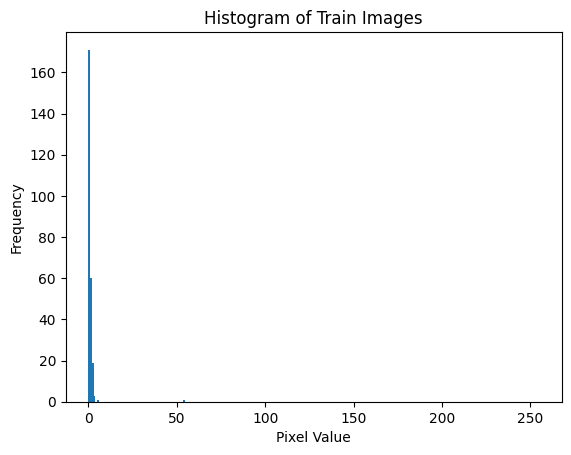

[618, 2, 3, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 0, 2, 0, 5, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 0, 2, 1, 1, 1, 54, 0, 1]


In [32]:
# Plot histogram
plt.hist(train_histograms[0], bins=256, range=(0, 255))
plt.title("Histogram of Train Images")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

# Print array values
print(train_histograms[0])


In [33]:
# Save train histograms to CSV
save_histograms_to_csv(train_histograms, train_labels, 'train.csv')
save_histograms_to_csv(test_histograms , test_labels , 'test.csv')


In [34]:
#doing the min max normalization to train data with min as 0 and max as 255 , so each value = value / 255
normalised_train_images = train_images/ 255
#min max normalization to test data
normalised_test_images = test_images / 255


In [35]:
normalised_train_images_flattened = [ image.flatten() for image in normalised_train_images ]
normalised_train_images_flattened = np.array(normalised_train_images_flattened)

normalised_test_images_flattened = [image.flatten() for image in normalised_test_images]
normalised_test_images_flattened = np.array(normalised_test_images_flattened)

In [36]:
from sklearn.manifold import TSNE

In [37]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(normalised_train_images_flattened)


<ipython-input-38-1dc2682ed41c>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c= train_labels, cmap=plt.cm.get_cmap("tab10", 10), marker="^", s=8)


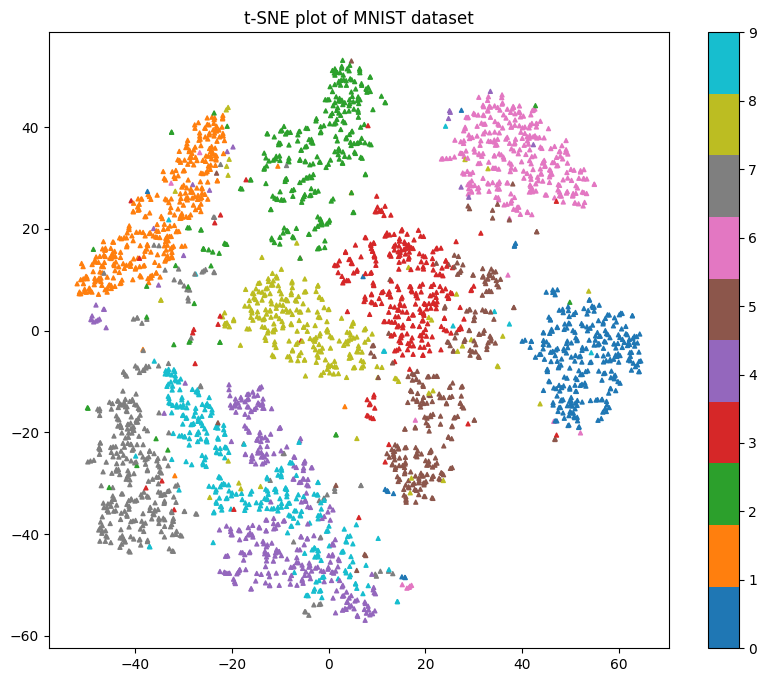

In [38]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c= train_labels, cmap=plt.cm.get_cmap("tab10", 10), marker="^", s=8)
plt.colorbar(ticks=range(10))
plt.title("t-SNE plot of MNIST dataset")
plt.show()

In [39]:
import numpy as np
train_data = np.genfromtxt('train.csv' , delimiter = ',' , dtype =  np.float64 , skip_header = 1);



In [40]:
#now we have the dataset

#creating a mask for selectin two classes from the training images
labels = train_data[: , 0]
mask = np.logical_or(labels == 0 , labels == 1)
train_data_subset = train_data[mask]
train_data_subset.shape


(624, 257)

In [41]:
test_data = np.genfromtxt('test.csv' , delimiter = ',' , dtype = np.float64 , skip_header = 1);

labels_test = test_data[: , 0]
mask_test = np.logical_or(labels_test == 0 , labels_test == 1)
test_data_subset = test_data[mask_test]

test_data_subset.shape


(109, 257)

In [42]:
def LSM(train_data , test_data):

  train_data = np.concatenate((np.ones((train_data.shape[0], 1), dtype=np.float64), train_data), axis=1)
  test_data = np.concatenate((np.ones((test_data.shape[0], 1), dtype=np.float64), test_data), axis=1)


  # Separating the label from the training data
  X_train = (train_data[:, 1:])
  y_train = (train_data[:, 0])


  # Separating the label from the testing data
  X_test = (test_data[:, 1:])
  y_test = (test_data[:, 0])


  temp = X_train.T @ X_train
  # print(temp.shape)
  # print(X_train.T)

  w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

  # Evaluating the model on the training data
  y_train_pred = X_train @ w
  mse_train = np.mean((y_train_pred - y_train) ** 2)

  # Evaluating the model on the testing data
  y_test_pred = X_test @ w
  mse_test = np.mean((y_test_pred - y_test) ** 2)
  print("Training MSE:", mse_train)
  print("Testing MSE:", mse_test)

In [43]:
#evaluation on all classes
LSM(train_data , test_data)

Training MSE: 9.839131583297549e-27
Testing MSE: 1.104938507699062e-26


In [44]:
#evaluation on two classes with labels as 0 and 1 only , but testing data may conatain any label
LSM(train_data_subset , test_data_subset)

Training MSE: 4.922056055570647e-26
Testing MSE: 6.075209143446383e-26


# QUE - 4




In [45]:
x_train = np.genfromtxt("train.csv",delimiter="," , dtype = np.float64 , skip_header = 1)
x_test = np.genfromtxt("test.csv",delimiter=',' , dtype = np.float64 , skip_header =  1)
standard_x_train = np.empty(x_train.shape)

In [46]:
for i in range(x_train.shape[1]):
    standard_x_train[:,i] = (x_train[:,i]-x_train[:,i].mean())

x_test_stand = np.empty(x_test.shape)
for i in range(x_test.shape[1]):
    x_test_stand[:,i] = (x_test[:,i]-x_test[:,i].mean())

In [47]:
def matrix_mal(mat1,mat2):
    malmat = np.zeros((mat1.shape[0],mat1.shape[0]))
    for i in range(mat1.shape[0]):
        for j in range(mat1.shape[0]):
            for k in range(mat1.shape[1]):
                malmat[i,j] += mat1[i,k]*mat2[k,j]
    return malmat

In [48]:
def Transpose(mat):
  trans_mat = np.empty((mat.shape[1],mat.shape[0]))
  for i in range(mat.shape[1]):
      for j in range(mat.shape[0]):
          trans_mat[i,j] = mat[j,i]
  return trans_mat


In [49]:
def find_COV_mat(mean_mat):
    trans_mean_mat = Transpose(mean_mat)
    cov = (matrix_mal(trans_mean_mat,mean_mat))/(mean_mat.shape[0]*mean_mat.shape[0])
    return cov


In [50]:

def Normal(arr):
    val = 0
    for i in range(arr.shape[0]):
        val+=(arr[i]*arr[i])
    return (val**(0.5))

In [51]:

def Eigen_vector(data,n_components):
    COV_MAT = find_COV_mat(data)
    eigen_vector = np.empty((data.shape[1],n_components))
    for i in range(n_components):
        vector = np.random.randn(COV_MAT.shape[0], 1)
        q = vector / Normal(vector)
        for j in range(5):
            x=COV_MAT@q
            q=x/Normal(x)
            eigen_val = Transpose(q)@(COV_MAT@q)
        COV_MAT = COV_MAT-eigen_val*matrix_mal(q, Transpose(q))
        eigen_vector[:,i] = q[:,0]
    return eigen_vector

In [52]:
def Projection(data,eigen_vector):
    projected_data=np.zeros((data.shape[0],2))
    for i in range(data.shape[0]):
        for j in range(2):
            for k in range(data.shape[1]):
                projected_data[i,j] += data[i,k]*eigen_vector[k,j]
    return projected_data

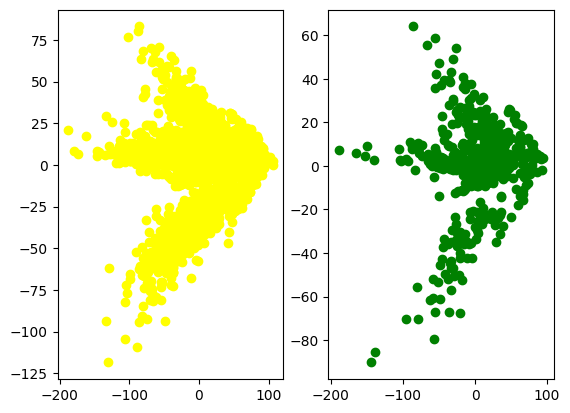

In [54]:
eigen_vector = Eigen_vector(standard_x_train[:,:], 2)

x_train_projected = Projection(standard_x_train[:,:],eigen_vector)
projected_x_test = Projection(x_test_stand[:,:],eigen_vector)

fig,(ax1,ax2) = plt.subplots(1,2)
ax1.scatter(x_train_projected[:,0],x_train_projected[:,1], color = 'yellow')
ax2.scatter(projected_x_test[:,0],projected_x_test[:,1], color = 'green')